In [7]:
import os
import pandas as pd
import os
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
if not os.path.exists('dataset'):
    with ZipFile('dataset.zip', 'r') as f:
        f.extractall()
    print('Unzipped')
else:
    print('Folder "dataset" already exist')

Folder "dataset" already exist


In [9]:
def all_files(folder):
    files = []
    for i,_,k in os.walk(folder):
        if len(k) != 0:
            for l in k:
                if l.endswith('.csv'):
                    files.append(os.path.join(i, l))
    return files

files = all_files('dataset')
files

['dataset/Malay/IEA-EV-dataEV_salesHistoricalCars.csv',
 'dataset/Yash/data.gov.in/RS_Session_257_AU_2368_A.csv',
 'dataset/Yash/data.gov.in/RS_Session_256_AU_2673_2.i.csv',
 'dataset/Yash/data.gov.in/RS_Session_256_AU_2673_1.csv',
 'dataset/pranay/RS_Session_258_AU_429_1.csv',
 'dataset/Adhiban/Google Trends/geoMap.csv',
 'dataset/Adhiban/Google Trends/multiTimeline.csv',
 'dataset/Adhiban/Electric Vehicle in India 2022/EV_India.csv',
 'dataset/Adhiban/EV_Cars_India_2023/EV_cars_India_2023.csv',
 'dataset/Adhiban/Electric Vehicle Population Data/Electric_Vehicle_Population_Data.csv',
 'dataset/Adhiban/Electric Vehicles User Reviews India/4-wheeler-EV-cardekho.csv',
 'dataset/Adhiban/Electric Vehicles User Reviews India/2-wheeler-EV-bikewale.csv',
 'dataset/Adhiban/Electric Vehicles User Reviews India/4-wheeler-EV-carwale.csv',
 'dataset/Adhiban/EV_CARS available in "INDIA" till oct-2021/EV_CARS _INDIA.csv']

In [10]:
for i in files:
    print(f'{os.path.basename(i)}: {pd.read_csv(i).shape[0]} rows')

IEA-EV-dataEV_salesHistoricalCars.csv: 2776 rows
RS_Session_257_AU_2368_A.csv: 4 rows
RS_Session_256_AU_2673_2.i.csv: 26 rows
RS_Session_256_AU_2673_1.csv: 16 rows
RS_Session_258_AU_429_1.csv: 35 rows
geoMap.csv: 37 rows
multiTimeline.csv: 237 rows
EV_India.csv: 36 rows
EV_cars_India_2023.csv: 30 rows
Electric_Vehicle_Population_Data.csv: 112634 rows
4-wheeler-EV-cardekho.csv: 140 rows
2-wheeler-EV-bikewale.csv: 844 rows
4-wheeler-EV-carwale.csv: 129 rows
EV_CARS _INDIA.csv: 11 rows


In [11]:
with open('files.csv', 'r') as f:
    pre_files = f.read().split('\n')

if pre_files == files:
    print('No New files found')
else:
    print('New files:')
    for i in files:
        if i not in pre_files:
            print(i)

New files:
dataset/Adhiban/Google Trends/geoMap.csv
dataset/Adhiban/Google Trends/multiTimeline.csv


In [12]:
# save these files
print('New file paths are saved')
with open('files.csv', 'w') as f:
    f.write('\n'.join(files))

New file paths are saved


In [52]:
cells = []
rows = []
columns = []
dfs = {}
for f in files:
    df = pd.read_csv(f)
    dfs[os.path.basename(f)] = df
    shape = df.shape
    total_cells = shape[0] * shape[1]
    rows.append(shape[0])
    columns.append(shape[1])
    cells.append(total_cells)

print(f'Total Rows: {sum(cells)}')
df = pd.DataFrame({'csv':[os.path.basename(i)\
                          .replace('.csv', '') for i in files], 
                   'rows':rows, 'columns':columns, 'cells':cells})
df = df.sort_values('cells', ascending=False)\
    .reset_index(drop=True)
df

Total Rows: 1952261


,csv,rows,columns,cells
0,Electric_Vehicle_Population_Data,112634,17,1914778
1,IEA-EV-dataEV_salesHistoricalCars,2776,8,22208
2,2-wheeler-EV-bikewale,844,14,11816
3,4-wheeler-EV-carwale,129,10,1290
4,RS_Session_258_AU_429_1,35,18,630
5,4-wheeler-EV-cardekho,140,4,560
6,EV_cars_India_2023,30,9,270
7,multiTimeline,237,1,237
8,EV_India,36,5,180
9,EV_CARS _INDIA,11,13,143


In [14]:
len(dfs)

14

# df0

In [15]:
df = dfs['IEA-EV-dataEV_salesHistoricalCars.csv']
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,4.600000e-04
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,1.700000e+02
...,...,...,...,...,...,...,...,...
2771,World,Historical,Oil displacement Mbd,Cars,EV,2022,Milion barrels per day,4.300000e-01
2772,World,Historical,"Oil displacement, million lge",Cars,EV,2022,"Oil displacement, million lge",2.500000e+04
2773,World,Historical,EV sales,Cars,BEV,2022,Vehicles,7.300000e+06
2774,World,Historical,EV sales share,Cars,EV,2022,percent,1.400000e+01


In [16]:
sum(df.region == 'India')

90

Here We get 90 rows of India data.

In [17]:
df = df[df.region == 'India']
df

,region,category,parameter,mode,powertrain,year,unit,value
1144,India,Historical,EV sales share,Cars,EV,2010,percent,0.021000
1145,India,Historical,EV stock,Cars,BEV,2010,Vehicles,880.000000
1146,India,Historical,EV sales,Cars,BEV,2010,Vehicles,450.000000
1147,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000016
1148,India,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",0.910000
...,...,...,...,...,...,...,...,...
1229,India,Historical,EV stock,Cars,BEV,2022,Vehicles,72000.000000
1230,India,Historical,Oil displacement Mbd,Cars,EV,2022,Milion barrels per day,0.001000
1231,India,Historical,"Oil displacement, million lge",Cars,EV,2022,"Oil displacement, million lge",57.000000
1232,India,Historical,EV stock share,Cars,EV,2022,percent,0.160000


In [18]:
df.category.unique()

array(['Historical'], dtype=object)

In [19]:
df.parameter.unique()

array(['EV sales share', 'EV stock', 'EV sales', 'Oil displacement Mbd',
       'Oil displacement, million lge', 'EV stock share',
       'Electricity demand'], dtype=object)

In [20]:
df['mode'].unique()

array(['Cars'], dtype=object)

In [21]:
df.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

In [22]:
df.unit.unique()

array(['percent', 'Vehicles', 'Milion barrels per day',
       'Oil displacement, million lge', 'GWh'], dtype=object)

In [23]:
df[df.year == 2010]

,region,category,parameter,mode,powertrain,year,unit,value
1144,India,Historical,EV sales share,Cars,EV,2010,percent,0.021000
1145,India,Historical,EV stock,Cars,BEV,2010,Vehicles,880.000000
1146,India,Historical,EV sales,Cars,BEV,2010,Vehicles,450.000000
1147,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000016
1148,India,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",0.910000
1149,India,Historical,EV stock share,Cars,EV,2010,percent,0.005200


## About

With the filtered data for India, we can perform various analyses, such as:

1. **EV Sales Trends in India**: Analyze how EV sales have evolved over the years in India.

2. **EV Stock Trends in India**: Examine the growth of EV stock in India.

3. **Powertrain Analysis**: Compare the sales and stock of different powertrain types (e.g., BEV, PHEV) in India.

4. **Market Share Analysis**: Calculate the market share of EVs in India and track its changes over time.

6. **Yearly Comparison**: Compare data between different years to identify trends and changes.

# df1

In [24]:
df = dfs['RS_Session_257_AU_2368_A.csv']
df

,Sl. No.,Vehicle Category,No. of electric vehicles
0,1,Two Wheeler,544643
1,2,Three Wheeler,793370
2,3,Four wheeler and above,54252
3,Grand Total,Grand Total,1392265


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sl. No.                    4 non-null      object
 1   Vehicle Category           4 non-null      object
 2   No. of electric vehicles   4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [26]:
df.columns

Index(['Sl. No.', 'Vehicle Category ', 'No. of electric vehicles '], dtype='object')

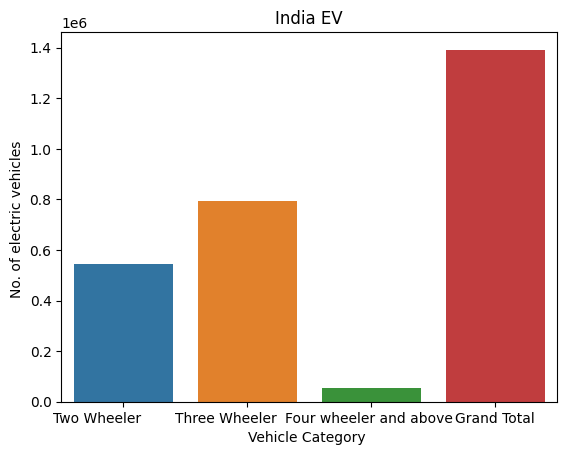

In [27]:
sns.barplot(x=df['Vehicle Category '], 
            y=df['No. of electric vehicles '])
plt.title('India EV');

# df2

In [28]:
df = dfs['RS_Session_256_AU_2673_2.i.csv']
df

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


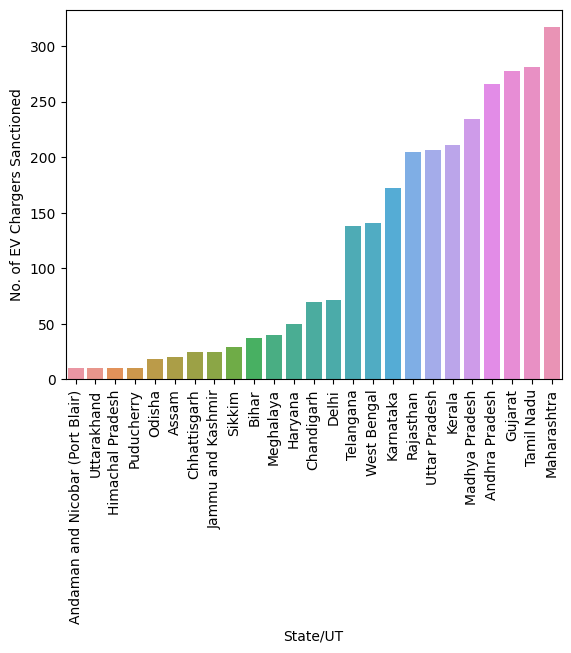

In [29]:
df = df.sort_values('No. of EV Chargers Sanctioned')
df = df.iloc[0:-1]
plot = sns.barplot(data=df, x='State/UT', y='No. of EV Chargers Sanctioned');
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

If there is more charging stations then customers can charge their EV when ever charge downs. So we have to target these customers

# df3

In [30]:
df = dfs['RS_Session_256_AU_2673_1.csv']
df

,Category,City/Highway,Charging Stations
0,City,Chandigarh,48
1,City,Delhi,94
2,City,Jaipur,49
3,City,B'Lore,60
4,City,Ranchi,30
5,City,Lucknow,1
6,City,Goa,30
7,City,Hyderabad,57
8,City,Agra,15
9,City,Shimla,9


# df4

In [31]:
df = dfs['RS_Session_258_AU_429_1.csv']
df

,S.No.,State Name,2WN,2WT,2WIC,3WN,3WT,LMV,LPV,LGV,4WIC,MMV,MPV,MGV,HPV,HGV,OTH,Grand Total
0,1,Andaman and Nicobar Island,2,5.0,NaN,NaN,30.0,86,6.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,169
1,2,Andhra Pradesh,27629,NaN,2.0,374.0,108.0,1050,3.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,1117.0,30449
2,3,Arunachal Pradesh,14,NaN,NaN,NaN,NaN,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,4,Assam,2287,NaN,NaN,NaN,79661.0,233,5.0,15.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,82216
4,5,Bihar,13472,NaN,NaN,2.0,96560.0,231,8.0,21.0,1.0,NaN,NaN,1.0,27.0,2.0,NaN,110325
5,6,Chandigarh,1004,NaN,NaN,NaN,2683.0,391,2.0,NaN,NaN,NaN,7.0,NaN,73.0,NaN,1.0,4161
6,7,Chhattisgarh,20112,NaN,NaN,130.0,9865.0,396,44.0,1070.0,NaN,NaN,1.0,NaN,NaN,7.0,367.0,31992
7,8,Delhi,43627,NaN,2.0,NaN,130429.0,5796,3415.0,50.0,4.0,NaN,2.0,NaN,416.0,NaN,NaN,183741
8,9,Goa,5555,1.0,NaN,4.0,55.0,861,4.0,25.0,NaN,NaN,NaN,NaN,51.0,1.0,2.0,6559
9,10,Gujarat,67990,NaN,3.0,32.0,2964.0,3926,91.0,51.0,6.0,2.0,60.0,6.0,364.0,7.0,153.0,75655


In [32]:
df.columns

Index(['S.No.', 'State Name', '2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV',
       'LGV', '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH', 'Grand Total'],
      dtype='object')

# df5

In [33]:
df = dfs['EV_India.csv']
df

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"
5,6,Chandigarh,2812,"7,46,881","7,49,693"
6,7,Chhattisgarh,20966,"68,36,200","68,57,166"
7,8,Delhi,"1,56,393","76,85,600","78,41,993"
8,9,Goa,3870,"10,71,570","10,75,440"
9,10,Gujarat,45272,"2,06,05,484","2,06,50,756"


We can target the place where people who buy EV more and non-EV less

# df6

In [34]:
df = dfs['EV_cars_India_2023.csv']
df

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN
5,Hyundai Kona Electric,23.84 - 24.03 lakh,39.2kWh,452 km/full charge,134.1 Bhp,6.16 Hours,Automatic,NaN,NaN
6,Mahindra XUV400 EV,15.99 - 18.99 lakh,34.5 kWh,375 s km/full charge,50min,Automatic,NaN,NaN,NaN
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,350 L (Liters),Automatic,NaN
8,Mercedes-Benz EQS,1.59 - 2.4 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN


# df7

In [35]:
df = dfs['Electric_Vehicle_Population_Data.csv']
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [36]:
for i in df.County.unique():
    print(i)

Monroe
Clark
Yakima
Skagit
Snohomish
Island
Thurston
Grant
St. Clair
Pierce
Saratoga
Stevens
King
Kitsap
Newport News
Jackson
Whitman
Lake
Spokane
Clallam
Cowlitz
Kittitas
Grays Harbor
Chelan
Whatcom
Benton
Walla Walla
Mason
San Juan
Lewis
Jefferson
Douglas
Klickitat
Geary
Skamania
Fairfax
Adams
Franklin
Okanogan
Sonoma
Asotin
Ferry
Pacific
Riverside
Orange
Columbia
Wahkiakum
Leavenworth
Contra Costa
Howard
Larimer
District of Columbia
Washington
Tipton
San Diego
Sumter
Prince George's
New Haven
Lincoln
Las Animas
Frederick
Hidalgo
Pend Oreille
Bexar
Garfield
Pennington
Honolulu
Anne Arundel
Montgomery
Houston
Charleston
Monterey
Kern
Napa
Loudoun
Harrison
Pulaski
Cumberland
Los Angeles
Ray
Salt Lake
Solano
Allegheny
Carroll
Clackamas
Kent
Harris
Ventura
Hamilton
Polk
Placer
Calvert
Sheridan
Kings
El Paso
Portsmouth
Elmore
Santa Clara
Pinal
Wayne
Alameda
Maricopa
Stafford
Santa Barbara
Fairbanks North Star
Plaquemines
Rock Island
Chaves
Palm Beach
Danville
Galveston
Virginia Beach
Suff

This dataset doesn't contain India data, we can use it to analyze other country data

# df8

In [37]:
df = dfs['4-wheeler-EV-cardekho.csv']
df

,Review,Rating,Attributes Mentioned,Model
0,Using it for the last 1 month. It's a gentle-l...,5.0,['mileage' 'performance' 'power' 'price' 'seat...,hyundai kona
1,"In the beginning, the car performed excellentl...",1.0,['mileage' 'performance' 'service' 'parts'],hyundai kona
2,Hyundai is the best performing company beating...,5.0,['performance' 'service'],hyundai kona
3,The car offers reasonable performance in this ...,5.0,['performance'],hyundai kona
4,Hyundai Kona - First electric car of India was...,4.0,['looks' 'comfort' 'interior' 'price' 'insuran...,hyundai kona
...,...,...,...,...
135,It's one of the best EVs of course after Tesla...,4.5,['mileage' 'comfort' 'steering'],BYD E6
136,A stylish and comfortable EV with great featur...,4.5,['looks' 'comfort'],BYD E6
137,Was using KIA Seltos automatic and Nexon EV. R...,4.5,['looks' 'comfort' 'space' 'automatic' 'experi...,BYD E6
138,BYD car really looking very nice. Outlook is f...,4.5,['looks' 'interior'],BYD E6


This is reviews of customers. This may be useful.

# df9

In [38]:
df = dfs['2-wheeler-EV-bikewale.csv']
df

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder


# df10

In [39]:
df = dfs['4-wheeler-EV-carwale.csv']
df

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona
...,...,...,...,...,...,...,...,...,...,...
124,A good car but overpriced a little. The starti...,5.0,4.0,4.0,4.0,3.0,New,Did a short drive once,4.0,tata tigor ev
125,Excellent vehicle driving dynamics and EVs are...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Did a short drive once,5.0,tata tigor ev
126,After government subsidy it becomes cheaper th...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Did a short drive once,5.0,tata tigor ev
127,Yes I love tata products .. A true Indian comp...,4.0,4.0,4.0,5.0,5.0,Not Purchased,Haven't driven it,5.0,tata tigor ev


# df11

In [40]:
df = dfs['EV_CARS _INDIA.csv']
df

,Brand Name,Battery Capacity(kWh),Acceleration(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Transmission,No. of Seats,Charging T(h),No. of Airbags,Drive Type,Price(Lh)
0,Audi RS e-tron GT,93.40,3.3,250,480,500,830,Automatic,5,9,Yes,AWD,204
1,Audi e-tron GT,93.40,4.1,245,500,523,630,Automatic,5,9,Yes,AWD,179
2,Audi e-tron,95.00,5.7,200,484,300,664,Automatic,5,9,Yes,AWD,123
3,Tata Nexon EV,30.20,9.9,180,312,96,245,Automatic,5,9,Yes,FWD,17
4,Tata Tigor EV,26.00,5.7,120,306,55,170,Automatic,5,9,Yes,FWD,14
5,Hyudai Kona Electric,39.20,9.7,155,452,103,395,Automatic,5,7,Yes,FWD,24
6,Jaguar I-Pace,90.00,4.8,200,470,294,696,Automatic,5,13,Yes,AWD,112
7,Mahindra eVerito,21.20,11.2,86,140,33,91,Automatic,5,12,Yes,FWD,10
8,MG ZS EV,44.50,8.5,120,340,107,353,Automatic,5,8,Yes,FWD,25
9,Mercedes Benz EQC,80.00,5.1,180,414,304,760,Automatic,5,21,Yes,AWD,100


# df12

In [57]:
df = dfs['geoMap.csv']
df = df.reset_index()
df.columns = ['Region', 'Electric vehicle']
df = df[1:].dropna().reset_index(drop=True)
df

,Region,Electric vehicle
0,Tamil Nadu,100
1,Karnataka,97
2,Haryana,88
3,Goa,85
4,Maharashtra,85
5,Puducherry,84
6,Telangana,81
7,Kerala,81
8,Gujarat,74
9,Dadra and Nagar Haveli,71


# df13

In [74]:
df = dfs['multiTimeline.csv']
df = df.reset_index()
df.columns = ['Month', 'Electric vehicle']
df = df[1:].dropna().reset_index(drop=True)
df

,Month,Electric vehicle
0,2004-01,73
1,2004-02,0
2,2004-03,100
3,2004-04,0
4,2004-05,0
...,...,...
231,2023-04,52
232,2023-05,45
233,2023-06,52
234,2023-07,53


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             236 non-null    object
 1   Electric vehicle  236 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [77]:
df['Electric vehicle'] = df['Electric vehicle'].astype(int)
df['Month'] = pd.to_datetime(df['Month'])

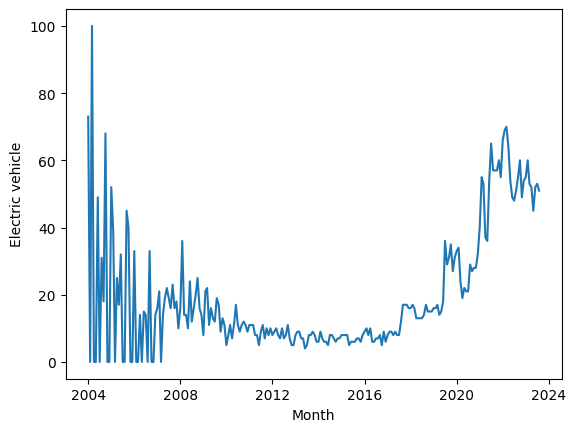

In [78]:
sns.lineplot(data=df, x='Month', y='Electric vehicle');